# Assignment 2 Zhen Zhong

## 1. Autoencoder 

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should be able to do better using convolutional layers instead of Dense layers.
Build and fit a convolutional autoencoder for the Fashion MNIST dataset.The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on.The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize
UpSampling2D to get the representation back to the original image size.

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\Zhen\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Download the data 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [4]:
## adapt this if using `channels_first` image data format
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
#Choose epochs=10 
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.3509 - val_loss: 0.3314
Epoch 2/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3227 - val_loss: 0.3208
Epoch 3/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.3125 - val_loss: 0.3174
Epoch 4/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3077 - val_loss: 0.3071
Epoch 5/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.3044 - val_loss: 0.3097
Epoch 6/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.3020 - val_loss: 0.3028
Epoch 7/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3001 - val_loss: 0.3003
Epoch 8/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.2984 - val_loss: 0.2966
Epoch 9/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2971 - val_loss: 0.2

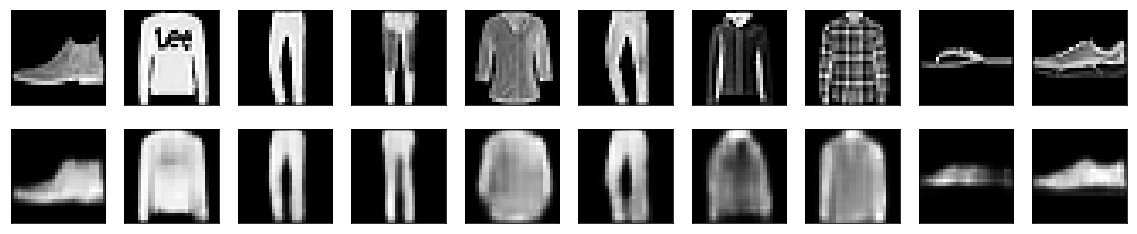

In [8]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification


We'll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.

### 2.1.  Deep CNN 

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you've made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model's performance on training set and test set.

In [7]:
# Tools for data transformation
from keras.utils import np_utils

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [8]:
# =============================
#  Building the CNN model 
# ============================
# Declaring sequential model
from keras.models import Sequential
from keras.layers import Dropout, Flatten

model = Sequential()
##Set up the kernel size, padding 

model.add(Conv2D(filters =64 ,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='same',
                 input_shape=(28,28,1)))

#Set the 2 by 2 Maxpooling layer 
#Set 0.25 Dropout rate
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#Sete fully connected layer with 64 Dense nodes
#Set 0.5 Dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [10]:
#Model Complice
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Fit the model 
#Set the epoch=5
#Set the validation rate as 30%
model.fit(x_train, Y_train,
          epochs=5,
          batch_size=128,
          validation_split = 0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 222s 5ms/step - loss: 0.3832 - acc: 0.8636 - val_loss: 0.2867 - val_acc: 0.8977
Epoch 2/5
42000/42000 [==============================] - 194s 5ms/step - loss: 0.3517 - acc: 0.8746 - val_loss: 0.2872 - val_acc: 0.8943
Epoch 3/5
42000/42000 [==============================] - 184s 4ms/step - loss: 0.3295 - acc: 0.8838 - val_loss: 0.2527 - val_acc: 0.9086
Epoch 4/5
42000/42000 [==============================] - 210s 5ms/step - loss: 0.3138 - acc: 0.8874 - val_loss: 0.2449 - val_acc: 0.9112
Epoch 5/5
10000/10000 [==============================] - 13s 1ms/step


In [13]:
#Evaluate Model 
test_score = model.evaluate(x_test, Y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.270441812813282
Test accuracy: 0.9007


I use two convolution layers and each layer accompanied with 64 3 by 3 filters, striding 1 by 1. Each convolution layer is followed has a max pooling layer with size 2 by 2. I apply the drop out at the last max pooling layer.Then we add two dense layers with 64 and 10 neurons respectively, accompanied with a drop out on both layear. I also apply relu activation on all layer except for the last layer, where softmax is used.

The model is trained for 5 epochs with 30% validation. Based on the results, the accuracy of validation set is around 89% while the accuracy of test is about 90%.

### 2.2 Transfer Learning 

Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet,VGG, etc). Report on your model's performance on training set and test set.

In [36]:
from keras.applications import ResNet50
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [37]:
# set minimum input size
conv_base = ResNet50(weights="imagenet",include_top=False,input_shape=(50,50,3))
transfer_model = Sequential()
transfer_model.add(conv_base)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation="relu"))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation="softmax"))   
conv_base.trainable = False
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 20,158,282
Trainable params: 133,898
Non-trainable params: 20,024,384
_________________________________________________________________


In [38]:
#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape (-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in x_train])/255.
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in x_test])/255.

x_train.shape, x_test.shape

((60000, 50, 50, 3), (10000, 50, 50, 3))

In [39]:
conv_base.trainable = False
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["acc"])

In [62]:
transfer_model.fit(x_train, Y_train,
          epochs=5,
          batch_size=128,
          validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 2233s 53ms/step - loss: 0.8289 - acc: 0.7052 - val_loss: 0.5920 - val_acc: 0.7904
Epoch 2/5
42000/42000 [==============================] - 2462s 59ms/step - loss: 0.6040 - acc: 0.7850 - val_loss: 0.5357 - val_acc: 0.8090
Epoch 3/5
42000/42000 [==============================] - 2439s 58ms/step - loss: 0.5507 - acc: 0.8026 - val_loss: 0.5077 - val_acc: 0.8171
Epoch 4/5
42000/42000 [==============================] - 1839s 44ms/step - loss: 0.5254 - acc: 0.8107 - val_loss: 0.4927 - val_acc: 0.8224
Epoch 5/5
42000/42000 [==============================] - 1892s 45ms/step - loss: 0.5048 - acc: 0.8176 - val_loss: 0.4758 - val_acc: 0.8268


In [63]:
#Evaluate model 
test_score = transfer_model.evaluate(x_test, Y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 337s 34ms/step
Test loss: 0.48518225479125976
Test accuracy: 0.8228


Based on the result, we can see that the accuracy of validation set is about 82% while the accuracy of test set is about 82.3% which seems fair. 

### 3.Text Classification 

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete sequences such as text. In this problem, we will tackle the task of text classification in the context of cybersecurity.

In [41]:
df_benigh = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
df_malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt', header = None)

In [42]:
df_benigh.columns = ['urls']
print(df_benigh.shape)
df_benigh.head()

(66056, 1)


,urls
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [43]:
df_malicious.columns = ['urls']
print(df_malicious.shape)
df_malicious.head()

(1296, 1)


,urls
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com


### 3.1 RNN 

Build and train a Recurrent Neural Network to solve this text classification task.You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [44]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding

In [45]:
df_benigh['class'] = 1
df_malicious['class'] = 0
np.random.seed(0)

# Downsizing the major class samples 
x_1 = df_benigh.sample(frac=5*df_malicious.shape[0]/df_benigh.shape[0]) #5:1


In [46]:
df = pd.concat([x_1, df_malicious], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df['urls'])

X_train = tokenizer.texts_to_sequences(df['urls'])
y_train = df['class']
#y_train = np_utils.to_categorical(df['class'], 2)

max_features = 1000
maxlen = df['urls'].str.len().max()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [48]:
input_train = sequence.pad_sequences(X_train, maxlen)
input_test = sequence.pad_sequences(X_test, maxlen)

In [49]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [50]:
rnn_model.fit(input_train, y_train, epochs=5, batch_size=128,validation_split=0.3)

Train on 3810 samples, validate on 1633 samples
Epoch 1/5
3810/3810 [==============================] - 3s 808us/step - loss: 0.3814 - acc: 0.8386 - val_loss: 0.3082 - val_acc: 0.8573
Epoch 2/5
3810/3810 [==============================] - 1s 358us/step - loss: 0.2642 - acc: 0.8885 - val_loss: 0.2146 - val_acc: 0.9204
Epoch 3/5
3810/3810 [==============================] - 1s 354us/step - loss: 0.1888 - acc: 0.9318 - val_loss: 0.2226 - val_acc: 0.9443
Epoch 4/5
3810/3810 [==============================] - 1s 360us/step - loss: 0.1425 - acc: 0.9612 - val_loss: 0.2623 - val_acc: 0.8794
Epoch 5/5
3810/3810 [==============================] - 1s 360us/step - loss: 0.1149 - acc: 0.9672 - val_loss: 0.0971 - val_acc: 0.9767


In [52]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
rnn_pred =rnn_model.predict_classes(input_test)
rnn_prob =rnn_model.predict_proba(input_test)
print('Precision: ',precision_score(y_test, rnn_pred))
print('Recall: ',recall_score(y_test, rnn_pred))
print('F1: ',f1_score(y_test, rnn_pred))
print('ROC AUC: ',roc_auc_score(y_test, rnn_prob))

Precision:  0.9947089947089947
Recall:  0.9730848861283644
F1:  0.9837781266352695
ROC AUC:  0.9918268510917323


We can see that the training accuracy is about 97% while the test accuracy is about 99%.

### 3.2 CNN 

Build and train a 1D CNN for this text classification task. You might gain some insight and inspiration from these text classification approaches:

In [53]:
from keras.layers import Conv1D

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 32)            6176      
_________________________________________________________________
flatten_4 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2689      
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
cnn_model.fit(input_train, y_train, epochs=5, batch_size=128,validation_split=0.3)

Train on 3810 samples, validate on 1633 samples
Epoch 1/5
3810/3810 [==============================] - 3s 679us/step - loss: 0.4294 - acc: 0.8134 - val_loss: 0.3357 - val_acc: 0.8261
Epoch 2/5
3810/3810 [==============================] - 1s 256us/step - loss: 0.2947 - acc: 0.8533 - val_loss: 0.2865 - val_acc: 0.8604
Epoch 3/5
3810/3810 [==============================] - 1s 271us/step - loss: 0.2494 - acc: 0.8761 - val_loss: 0.2324 - val_acc: 0.8861
Epoch 4/5
3810/3810 [==============================] - 1s 293us/step - loss: 0.1975 - acc: 0.9186 - val_loss: 0.1795 - val_acc: 0.9290
Epoch 5/5
3810/3810 [==============================] - 1s 262us/step - loss: 0.1507 - acc: 0.9475 - val_loss: 0.1378 - val_acc: 0.9535


### 3.3  

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don't forget to create a train-test split.

In [57]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
cnn_pred =cnn_model.predict_classes(input_test)
cnn_prob =cnn_model.predict_proba(input_test)
print('CNN performance:')
print('Precision: ',precision_score(y_test, cnn_pred))
print('Recall: ',recall_score(y_test,cnn_pred))
print('F1: ',f1_score(y_test, cnn_pred))
print('ROC AUC: ',roc_auc_score(y_test, cnn_prob))
print('\n====================================\n')
print('RNN performance')
print('Precision: ',precision_score(y_test, rnn_pred))
print('Recall: ',recall_score(y_test, rnn_pred))
print('F1: ',f1_score(y_test, rnn_pred))
print('ROC AUC: ',roc_auc_score(y_test, rnn_prob))

CNN performance:
Precision:  0.9668705402650357
Recall:  0.9818840579710145
F1:  0.9743194658448896
ROC AUC:  0.9878409566146745


RNN performance
Precision:  0.9947089947089947
Recall:  0.9730848861283644
F1:  0.9837781266352695
ROC AUC:  0.9918268510917323


In [61]:
#Build the ROC Curve
from sklearn.metrics import roc_curve

y_pred_rnn = rnn_model.predict(input_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

y_pred_cnn = cnn_model.predict(input_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

In [59]:
from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

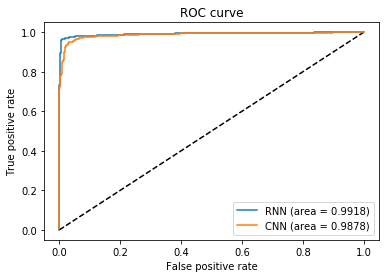

In [60]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.4f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.4f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

We compared an rnn model with convoluiton layer of 32 filters and a cnn model with a convoluiton layers of 32 filters respectively. Both models are trained for 5 epochs with a 30% validation set. Based on the evaluation, we can see that the performance of both model are similar. RNN model has better precision than CNN model, while recall shows the opposite result. The ROC AUC are high for both model due to imbalanced class size. The ROC AUC of RNN Model is slightly higher than the ROC AUC of CNN Model.